# **Project: Reportes de Siniestros Viales (2016-2018)**

The project will make use of the data provided in the webpage of the Open Data of the Mexico City [(link)](https://datos.cdmx.gob.mx/explore/dataset/reportes-de-siniestros-viales-c5/table/?dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJzcGxpbmUiLCJmdW5jIjoiQVZHIiwieUF4aXMiOiJvYmplY3RpZCIsInNjaWVudGlmaWNEaXNwbGF5Ijp0cnVlLCJjb2xvciI6InJhbmdlLUFjY2VudCJ9XSwieEF4aXMiOiJkZXRlbmlkb3MiLCJtYXhwb2ludHMiOiIiLCJ0aW1lc2NhbGUiOiIiLCJzb3J0IjoiIiwic2VyaWVzQnJlYWtkb3duIjoiZGVsZWdhY2lvbiIsImNvbmZpZyI6eyJkYXRhc2V0IjoicmVwb3J0ZXMtZGUtc2luaWVzdHJvcy12aWFsZXMtYzUiLCJvcHRpb25zIjp7fX19XSwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZSwidGltZXNjYWxlIjoiIn0%3D); specifically data from *Reportes de Siniestros Viales* is going to be analyzed.

First, all the necesary libraries will be imported.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (24,12)
plt.style.use('ggplot')

The data is loaded into a dataframe, and the first rows are shown in order to explore the information.

In [4]:
data = pd.read_csv('reportes-de-siniestros-viales-c5.csv', sep=';', low_memory=False)
data.head()

,Año,Mes,Día de la Semana,Incidente Desagregado,Alcaldía,Colonia,Geo Point,Geo Shape,OBJECTID,Folio,...,Latitud,Incidente Agregado,longitud,codigo_cie,Detenidos,clas_con_f,tipo_entra,delegaci_1,fecha_1,Día Mes
0,2016.0,Enero,Martes,Choque sin lesionados,CUAUHTEMOC,CENTRO,"19.425844, -99.131426","{""type"": ""Point"", ""coordinates"": [-99.131426, ...",1542,CH/160105/01424,...,19.425844,Accidente,-99.131426,A,NaN,EMERGENCIA,BOTÓN DE AUXILIO,CUAUHTEMOC,2016/01/05,5.0
1,2016.0,Enero,Martes,Atropellado,BENITO JUAREZ,REFORMA IZTACCIHUATL NORTE,"19.38842001, -99.13286016","{""type"": ""Point"", ""coordinates"": [-99.13286015...",1536,C4/160105/03680,...,19.388420,Lesionado,-99.132860,A,NaN,URGENCIAS MEDICAS,LLAMADA DEL 066,IZTACALCO,2016/01/05,5.0
2,2016.0,Enero,Martes,Choque sin lesionados,VENUSTIANO CARRANZA,MOCTEZUMA 1RA SECC,"19.42449003, -99.10456992","{""type"": ""Point"", ""coordinates"": [-99.10456991...",1554,C4/160105/02341,...,19.424490,Accidente,-99.104570,D,NaN,EMERGENCIA,LLAMADA DEL 066,VENUSTIANO CARRANZA,2016/01/05,5.0
3,2016.0,Enero,Martes,Choque sin lesionados,ALVARO OBREGON,TORRES DE POTRERO,"19.32874002, -99.25530012","{""type"": ""Point"", ""coordinates"": [-99.25530011...",1563,C4/160105/02530,...,19.328740,Accidente,-99.255300,A,NaN,EMERGENCIA,LLAMADA DEL 066,ALVARO OBREGON,2016/01/05,5.0
4,2016.0,Enero,Martes,Choque sin lesionados,COYOACAN,LOS GIRASOLES II,"19.30390002, -99.12470004","{""type"": ""Point"", ""coordinates"": [-99.12470003...",1583,C4/160105/03360,...,19.303900,Accidente,-99.124700,A,NaN,EMERGENCIA,LLAMADA DEL 066,TLALPAN,2016/01/05,5.0


The types in the dataframe are shown.

In [75]:
data.dtypes

Año                      float64
Mes                       object
Día de la Semana          object
Incidente Desagregado     object
Alcaldía                  object
Colonia                   object
Geo Point                 object
Geo Shape                 object
OBJECTID                   int64
Folio                     object
Origen                    object
Fecha de Creación         object
Hora de Creación          object
Existencia de vid         object
Incidente1                object
Calle                     object
Número                    object
Esquina                   object
Código Postal              int64
Latitud                  float64
Incidente Agregado        object
longitud                 float64
codigo_cie                object
Detenidos                float64
clas_con_f                object
tipo_entra                object
delegaci_1                object
fecha_1                   object
Día Mes                  float64
dtype: object

For convenience, the columns `fecha_1` and  `Hora de Creacíon` will be transformed into *datetime* and *timedelta* objects respectively.

In [79]:
data.fecha_1 = pd.to_datetime(data.fecha_1)

In [135]:
data['Hora de Creación'] = pd.to_timedelta(data['Hora de Creación'], errors='coerce')

C:\Users\XHOAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



The data from 2014 will be discarded since none of the registries from this year have a correct date to be filtered.

In [123]:
data = data[data.fecha_1.dt.year != 2014]

A lineplot is made in order to see the trend in the incidencies varying with time by municipality.

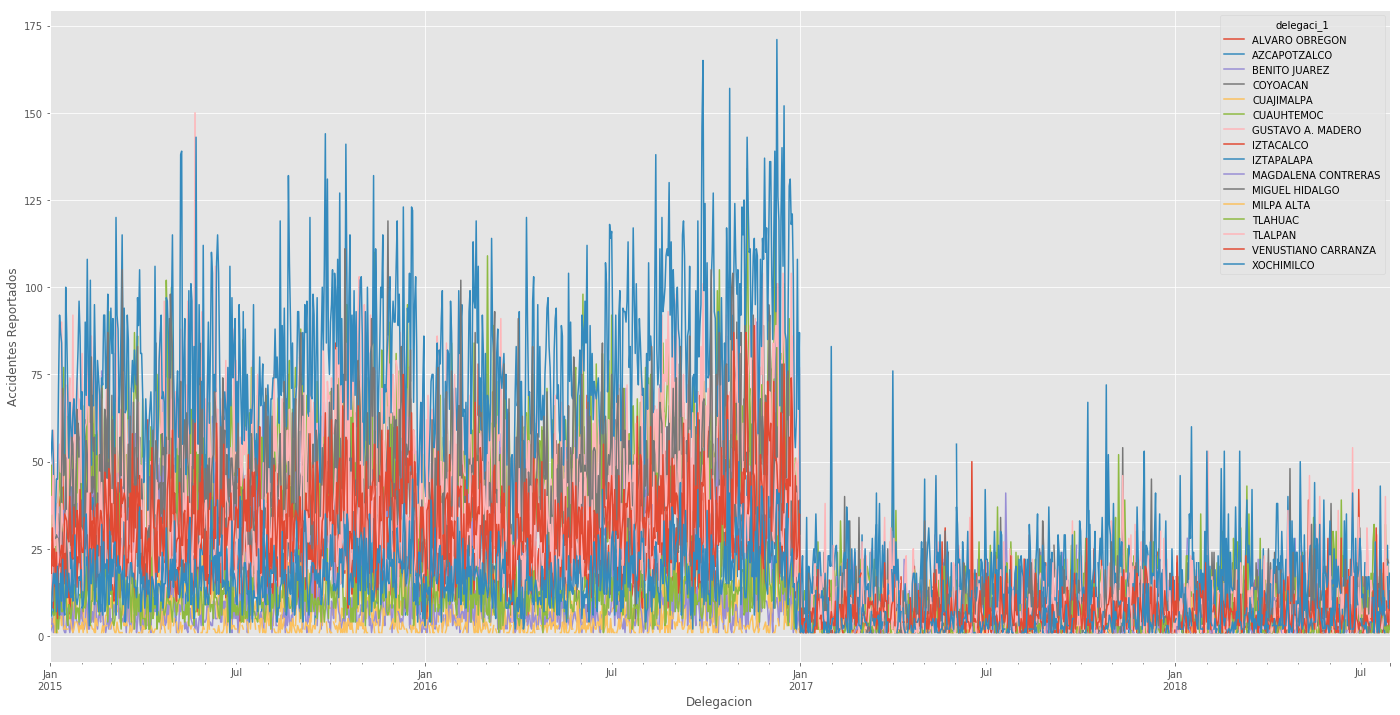

In [127]:
data.pivot_table(index='fecha_1', columns=['delegaci_1'], values='Mes', aggfunc='count').plot();
plt.xlabel('Delegacion');
plt.ylabel('Accidentes Reportados');

A histogram is made to see in which hours of the day more accidents occur.

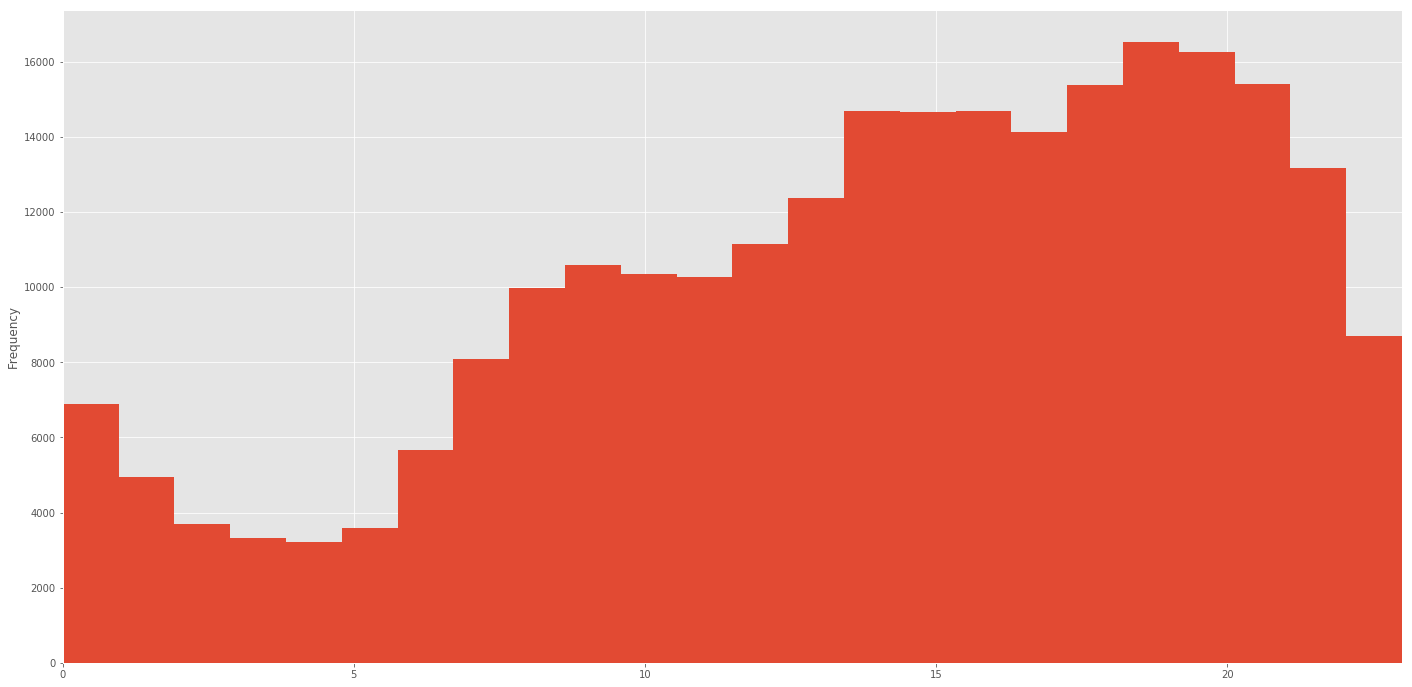

In [184]:
data[~data['Hora de Creación'].isna()]['Hora de Creación'].astype('timedelta64[h]').plot.hist(bins=24);
plt.xlim(0,23);

The boxplot below shows the monthly distribution of accidents by day.

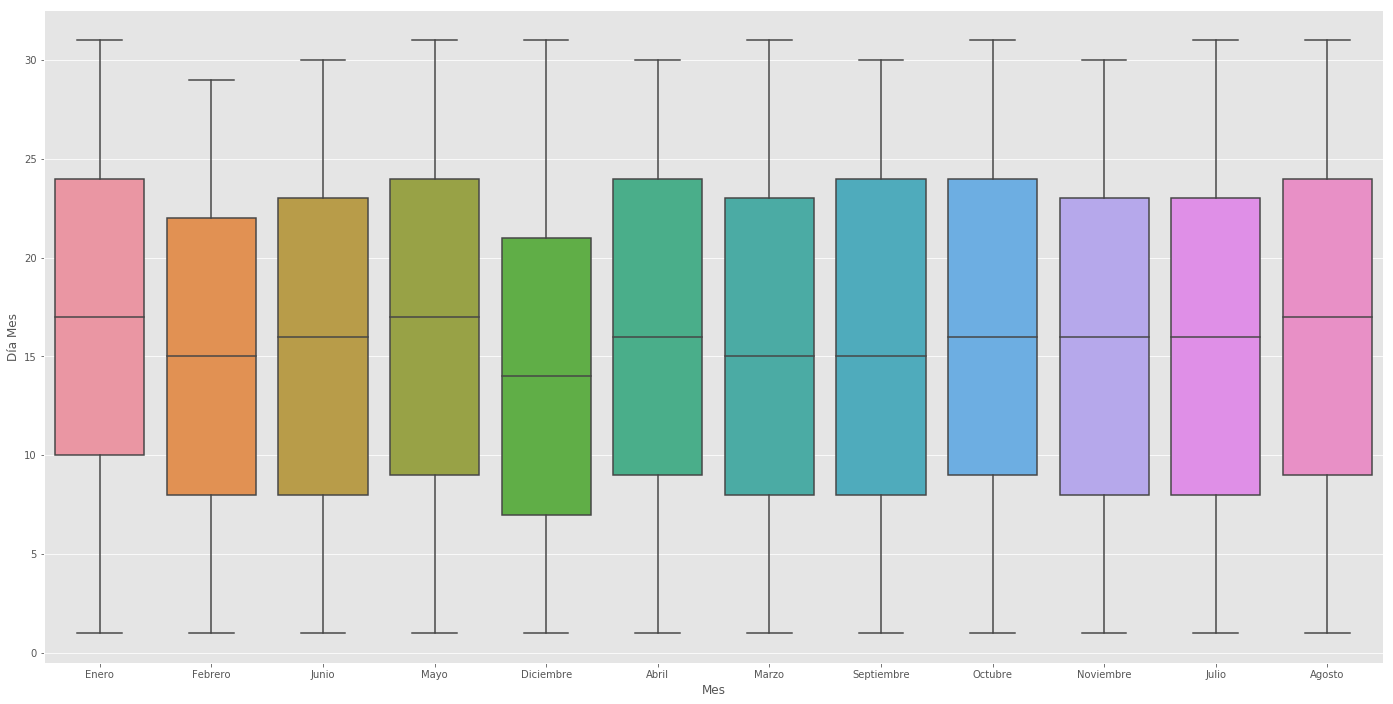

In [191]:
sns.boxplot(x='Mes', y='Día Mes', data=data);

In the bar plot below it can be seen the rank of accidents by type of occurence.

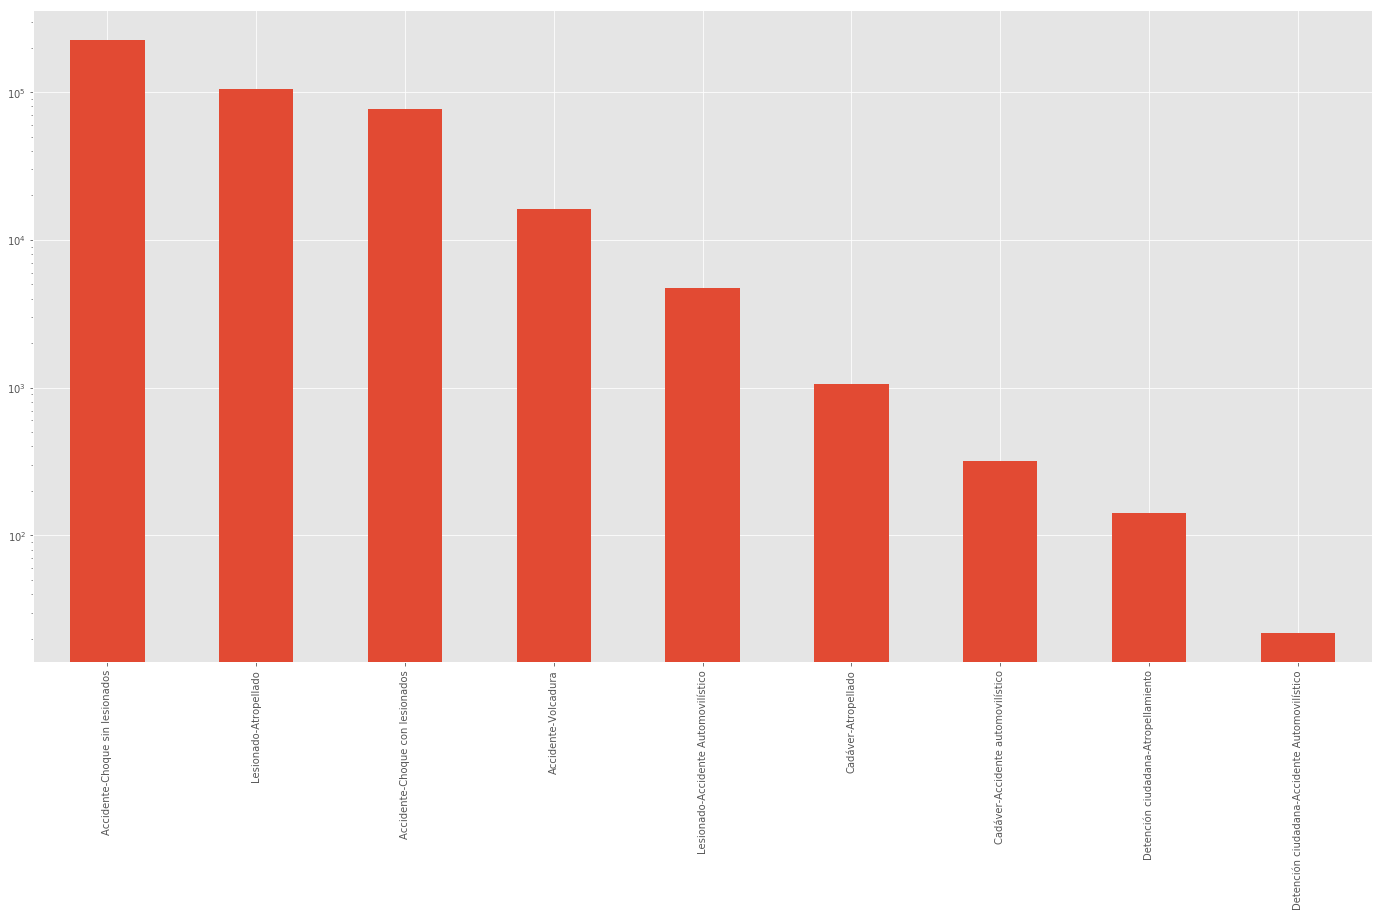

In [285]:
data['Incidente1'].value_counts().plot(kind='bar').set_yscale('log');

To try to see the correlation between all variables, a matrix scatter plot is made below.

C:\Users\XHOAN\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\XHOAN\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal



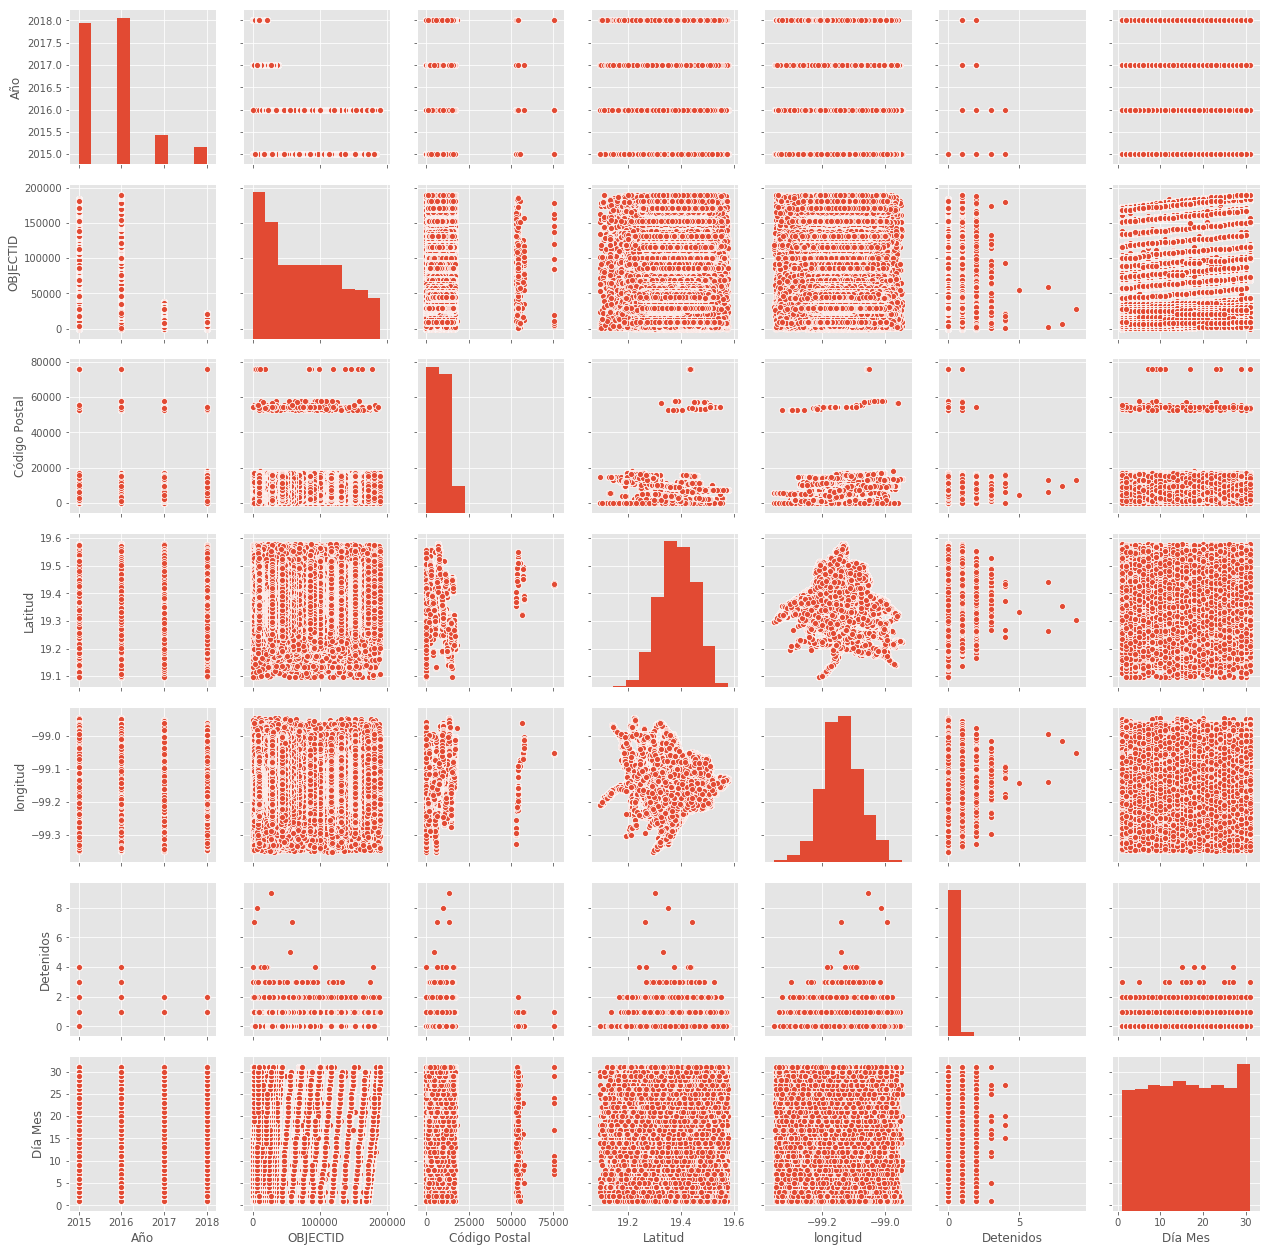

In [225]:
sns.pairplot(data.select_dtypes(include='number'));

Monthly incidents count from April 2015 to May 2018

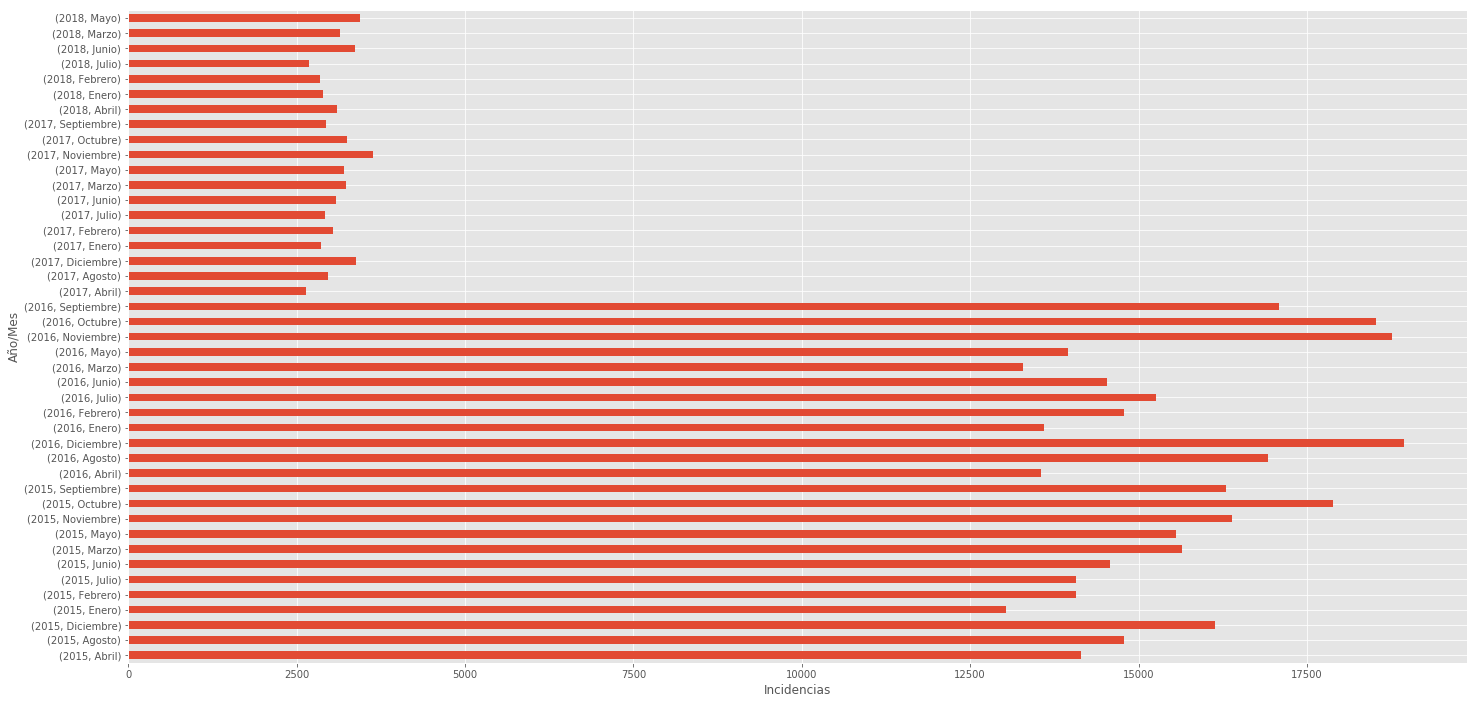

In [254]:
data.groupby(['Año', 'Mes']).count()['Origen'].plot(kind='barh');
plt.ylabel('Año/Mes');
plt.xlabel('Incidencias');

Total annual incidents by suburb.

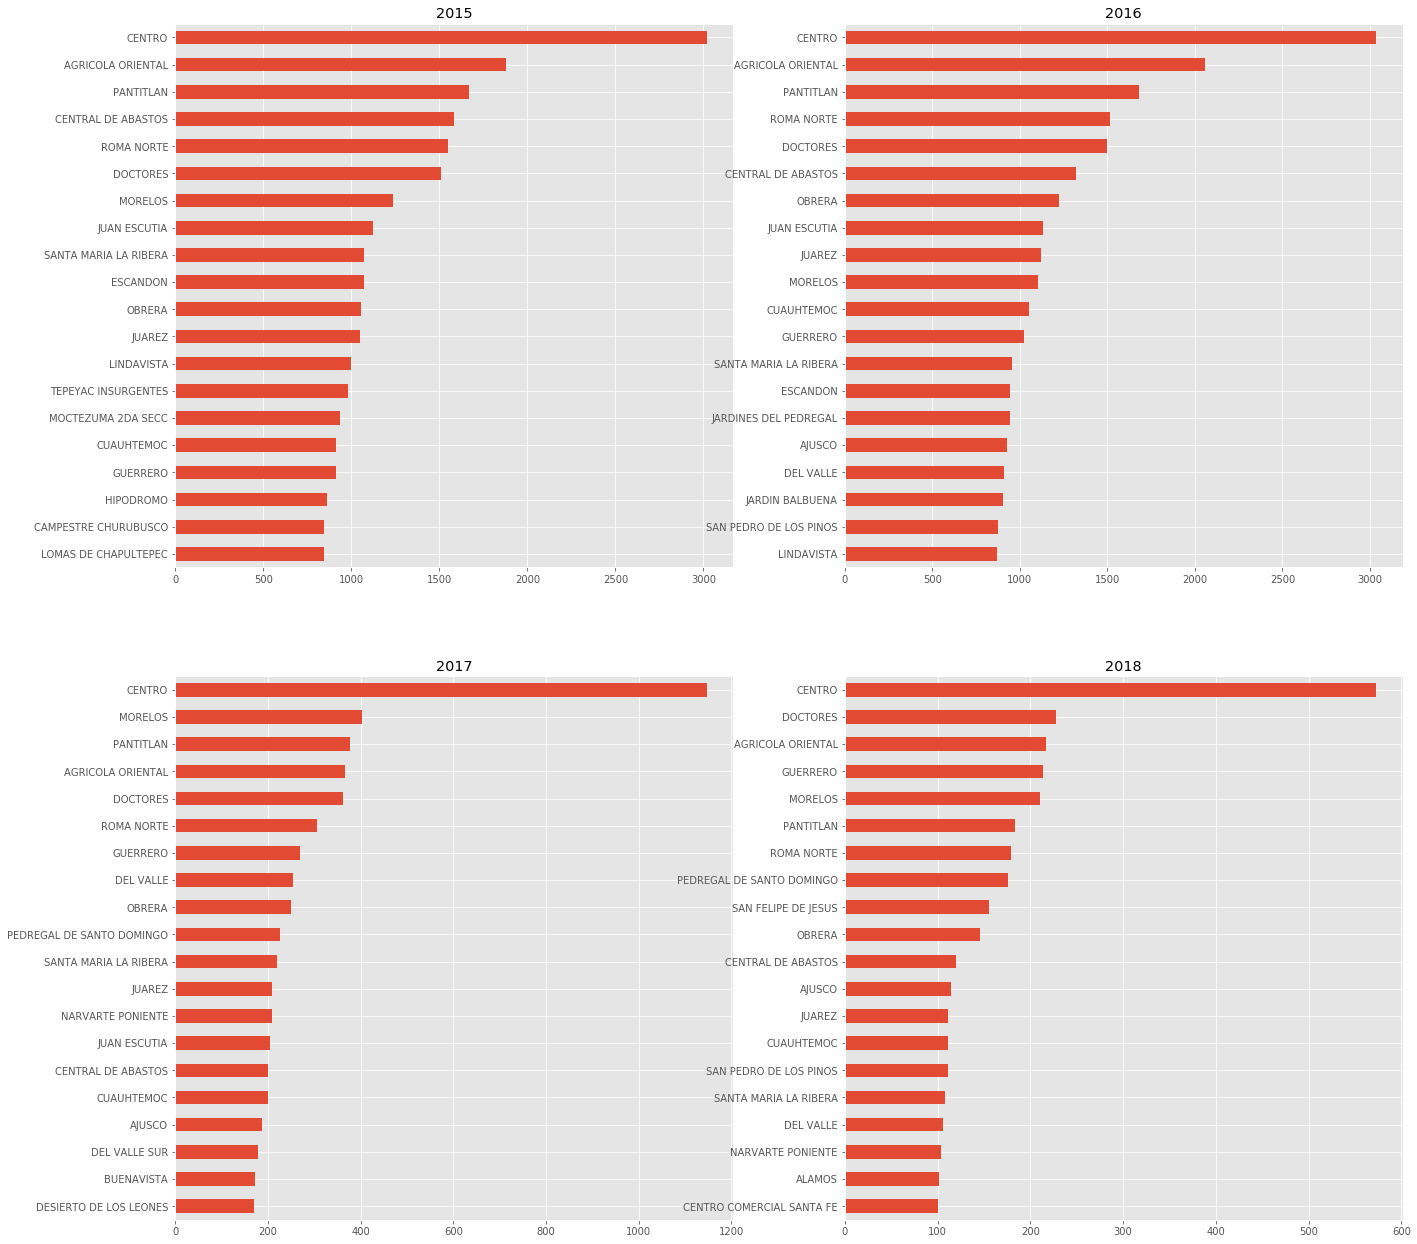

In [272]:
fig, axes = plt.subplots(2,2, figsize=(22,22))

yrs = [2015, 2016, 2017, 2018]
it = 0

for i in range(2):
    for j in range(2):
        data.Colonia[data.fecha_1.dt.year == yrs[it]].value_counts(ascending = True)[-20:].plot(kind='barh', ax=axes[i][j]);
        axes[i][j].set_title(yrs[it])
        it += 1

Total calls by origin.

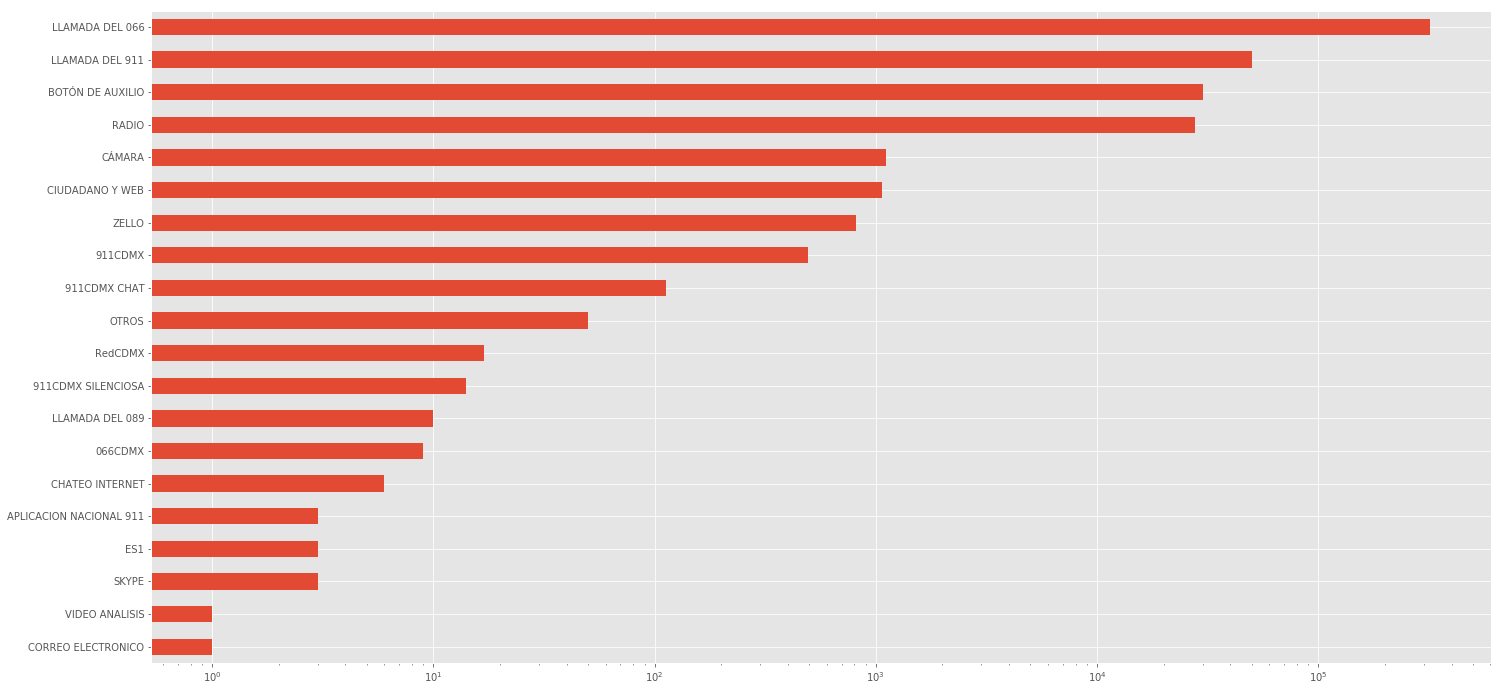

In [284]:
data['Origen'].value_counts(ascending=True).plot(kind='barh').set_xscale('log');